# Vector Databases Overview in LlamaIndex
* Notebook by Adam Lang
* Date: 3/21/2024
* We will go over basic Vector Database techniques using LlamaIndex and the following Vector DBs:
  1. Chroma
  2. Pinecone

In [2]:
## install llamaindex
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00


### Setup OpenAI Access

In [3]:
import os
os.environ["OPENAI_API_KEY"] = '<your_key>'

### Download Data
* We are going to use an Uber dataset

In [4]:
!mkdir -p data
!wget 'https://raw.githubusercontent.com/jerryjliu/llama_index/main/docs/examples/data/10k/uber_2021.pdf' -O 'data/uber_2021.pdf'

--2024-03-21 19:11:02--  https://raw.githubusercontent.com/jerryjliu/llama_index/main/docs/examples/data/10k/uber_2021.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1880483 (1.8M) [application/octet-stream]
Saving to: ‘data/uber_2021.pdf’

data/uber_2021.pdf  100%[===================>]   1.79M  9.16MB/s    in 0.2s    

2024-03-21 19:11:02 (9.16 MB/s) - ‘data/uber_2021.pdf’ saved [1880483/1880483]



### Load Data

In [5]:
from pathlib import Path
from llama_index.core import download_loader

# instantiate PDFReader
PDFReader = download_loader("PDFReader")
loader = PDFReader()
documents = loader.load_data(file=Path('./data/uber_2021.pdf'))

<ipython-input-5-15c2f8c611eb>:5: DeprecationWarning: Call to deprecated function (or staticmethod) download_loader. (`download_loader()` is deprecated. Please install tool using pip install directly instead.)
  PDFReader = download_loader("PDFReader")


# 1. VectorStoreIndex
* create a `VectorStoreIndex`

In [7]:
from llama_index.core import VectorStoreIndex

In [8]:
# construct an index by loading documents into a VectorStoreIndex
index = VectorStoreIndex.from_documents(documents)

### Save index to local disk

In [9]:
# create an index directory
!mkdir index

In [10]:
# save within an index folder
index.storage_context.persist(persist_dir="./index")

In [13]:
# import libraries from llamaindex
from llama_index.core import StorageContext, load_index_from_storage

In [14]:
# rebuild storage context
storage_context = StorageContext.from_defaults(persist_dir="./index")

In [15]:
# load the index
index = load_index_from_storage(storage_context)

# 2. Using ChromaDB with LlamaIndex

In [19]:
!pip install chromadb llama-index-vector-stores-chroma

In [21]:
# import libraries
import chromadb
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext

In [22]:
# load documents
documents = SimpleDirectoryReader("./data").load_data()

In [23]:
# initialize client, setting path to save data
db = chromadb.PersistentClient(path="./chroma_db")

In [24]:
# create a collection
chroma_collection = db.get_or_create_collection("quickstart")

In [26]:
# assign chroma as the vector_store to the context
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [27]:
# create an index
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

#### Result of the above code is a chromaDB vector store:
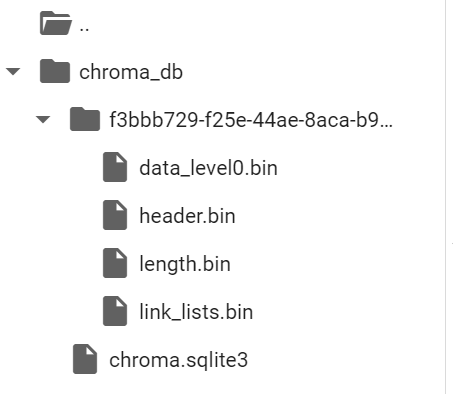

# 3. Using Pinecone Vector Database with LlamaIndex

In [48]:
!pip install pinecone-client llama-index-vector-stores-pinecone

In [37]:
# import pinecone
from pinecone import Pinecone
import os

In [41]:
# initalize client connection to Pinecone
pc = Pinecone(api_key="<your_api_key", environment='us-east1-gcp')

In [44]:
# create serverless index for text-embedding-ada-002
pc.create_index(
    name="quickstart",
    dimension=1536,
    metric="euclidean",
    spec=ServerlessSpec(cloud="aws", region="us-west-2"),
)

In [46]:
# create pinecone index
pinecone_index = pinecone.Index("quickstart", host="localhost")

In [47]:
# load some documents
documents = SimpleDirectoryReader("./data").load_data()

In [50]:
# import llamaindex pineconevectorstore
from llama_index.vector_stores.pinecone import PineconeVectorStore

#instatiate vector store
vector_store = PineconeVectorStore(pinecone_index=pinecone_index)

In [51]:
# create storage_context
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [ ]:
# create index
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

That's it, the code should create a vector index in your pinecone vector database.